# Feature Detection

## General Imports

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Images

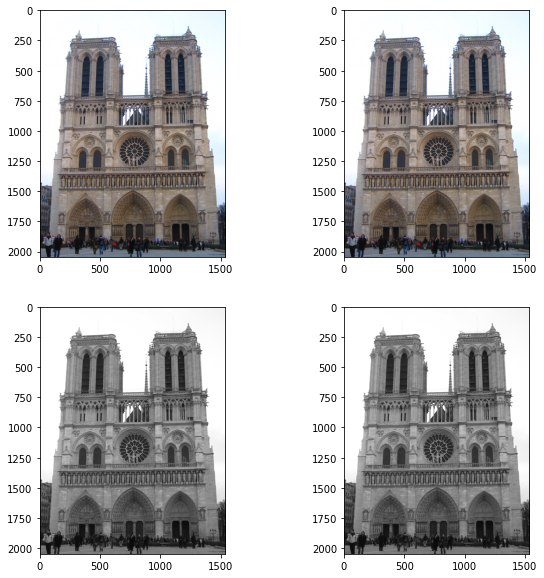

In [2]:
img1 = cv2.imread('data/notredame_1.jpg')
img2 = cv2.imread('data/notredame_2.jpg')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img1_bw = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_bw = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img1_rgb)
plt.subplot(2,2,2)
plt.imshow(img1_rgb)
plt.subplot(2,2,3)
plt.imshow(img1_bw, cmap='gray')
plt.subplot(2,2,4)
plt.imshow(img2_bw, cmap='gray')

## Harris Corner Detection

### 1. Compute Image Gradients

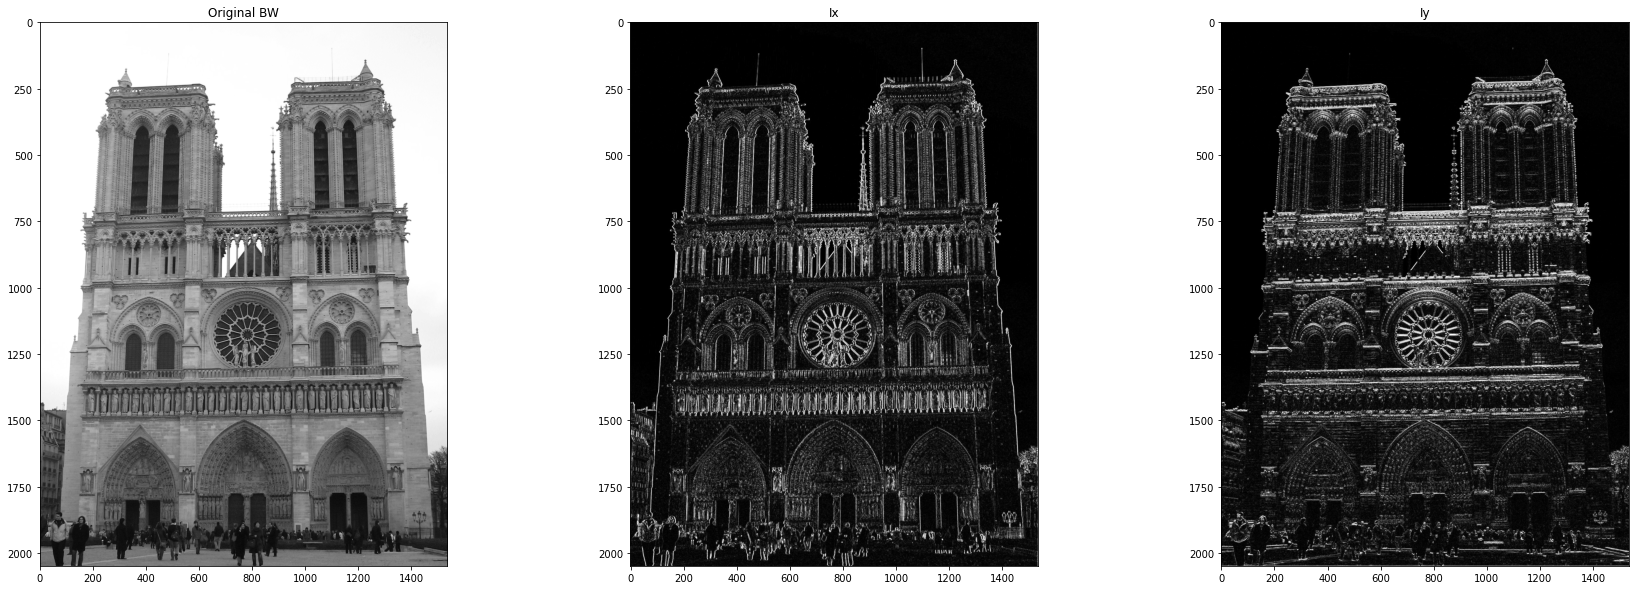

In [11]:
from src.harris_corner import image_gradients

Ix, Iy = image_gradients(img1_bw)
Ix_img = cv2.convertScaleAbs(Ix)
Iy_img = cv2.convertScaleAbs(Iy)

plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.title('Original BW')
plt.imshow(img1_bw, cmap='gray')
plt.subplot(1,3,2)
plt.title('Ix')
plt.imshow(Ix_img, cmap='gray')
plt.subplot(1,3,3)
plt.title('Iy')
plt.imshow(Iy_img, cmap='gray')

### 2. Compute Second Moments

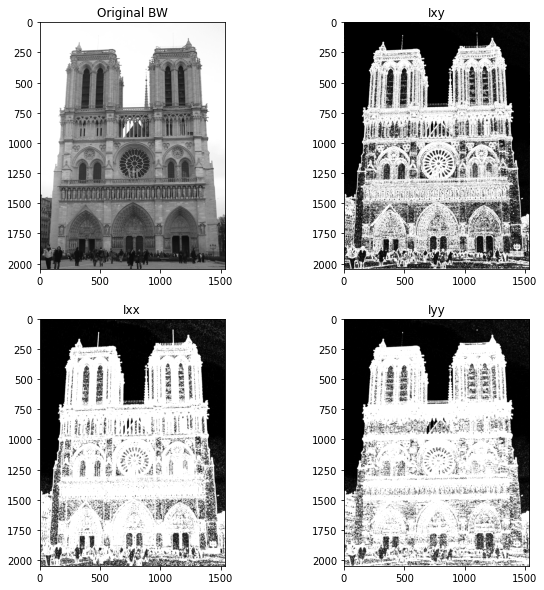

In [12]:
from src.harris_corner import second_moments

Ixx, Iyy, Ixy = second_moments(Ix, Iy)
Ixx_img = cv2.convertScaleAbs(Ixx)
Iyy_img = cv2.convertScaleAbs(Iyy)
Ixy_img = cv2.convertScaleAbs(Ixy)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Original BW')
plt.imshow(img1_bw, cmap='gray')
plt.subplot(2,2,2)
plt.title('Ixy')
plt.imshow(Ixy_img, cmap='gray')
plt.subplot(2,2,3)
plt.title('Ixx')
plt.imshow(Ixx_img, cmap='gray')
plt.subplot(2,2,4)
plt.title('Iyy')
plt.imshow(Iyy_img, cmap='gray')

### 3. Harris Response Map

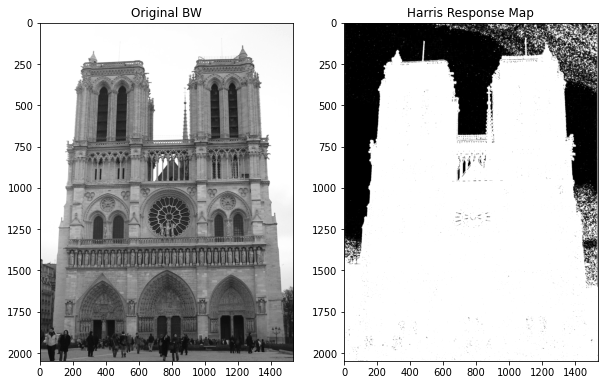

In [14]:
from src.harris_corner import harris_response_map

hrm = harris_response_map(Ixx, Iyy, Ixy)
hrm_img = cv2.convertScaleAbs(hrm)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Original BW')
plt.imshow(img1_bw, cmap='gray')
plt.subplot(1,2,2)
plt.title('Harris Response Map')
plt.imshow(hrm_img, cmap='gray')

### 4. Find Corners

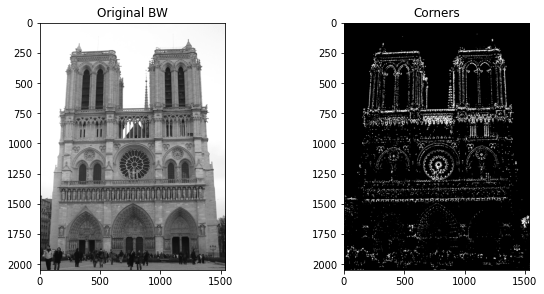

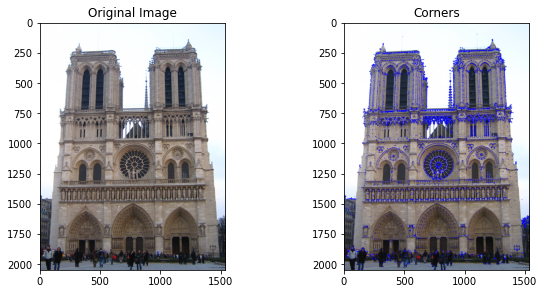

In [27]:
from src.harris_corner import find_corners

corners = find_corners(hrm)
img_rgb = deepcopy(img1_rgb)
img_rgb[corners == 255] = [0, 0, 255]

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Original BW')
plt.imshow(img1_bw, cmap='gray')
plt.subplot(2,2,2)
plt.title('Corners')
plt.imshow(corners, cmap='gray')
plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
plt.title('Original Image')
plt.imshow(img1_rgb)
plt.subplot(2,2,4)
plt.title('Corners')
plt.imshow(img_rgb, cmap='gray')

### 5. cv2 Implementation

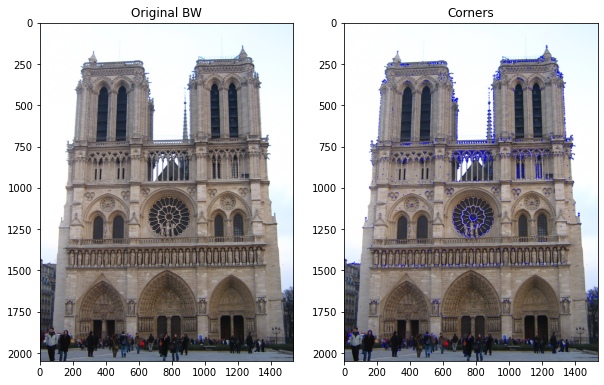

In [26]:
gray = np.float32(img1_bw)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
img_rgb = deepcopy(img1_rgb)
img_rgb[dst > 0.01 * dst.max()]=[0, 0, 255]

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img1_rgb)
plt.subplot(1,2,2)
plt.title('Corners')
plt.imshow(img_rgb, cmap='gray')